# Classification des sections


## calcules pour classifier des section comprression ou flexion dans une ame et en compression uniquement pour les semelles 

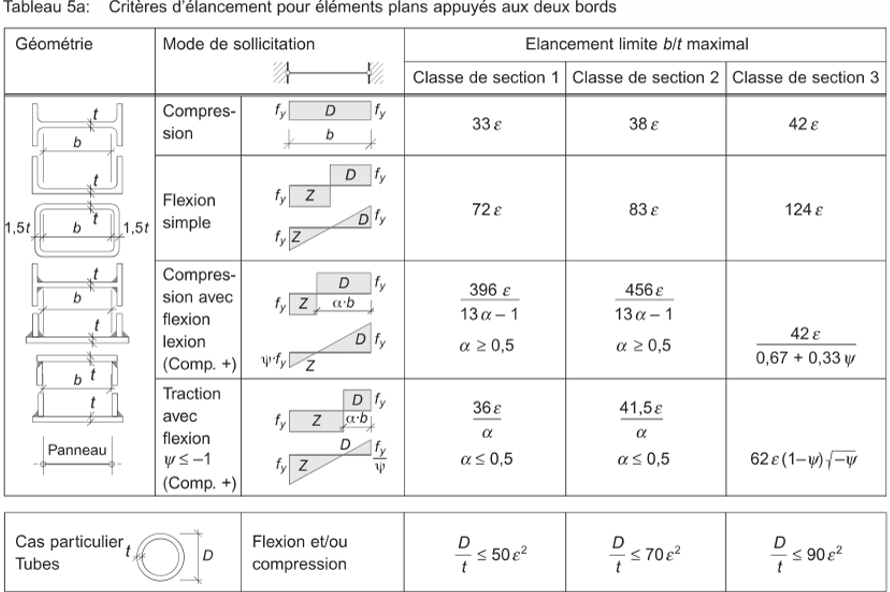
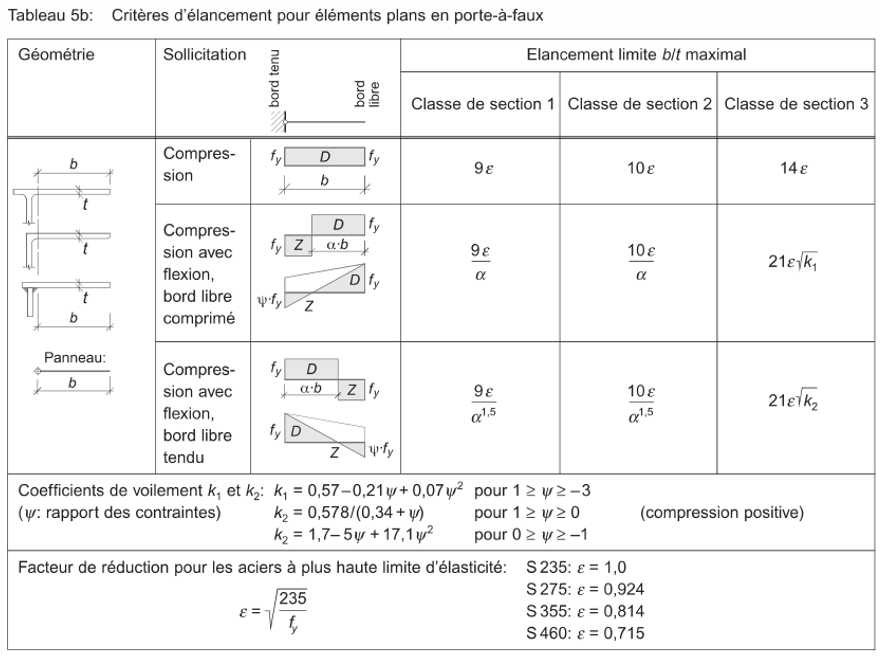

## Rentrer les valeurs 

In [6]:
# fichier: classification_semelles_ames.py

# Définir les données des éléments dans l'ordre spécifié (Semelle, Âme, Semelle)
ELEMENTS = [
    {"type": "semelle", "b": 200, "t": 10, "fy": 355, "sollicitation": "compression", "bord": "bord libre"}, # Élément 1
    {"type": "âme", "b": 200, "t": 8, "fy": 235, "sollicitation": "flexion simple"},                        # Élément 2
    {"type": "semelle", "b": 150, "t": 6, "fy": 275, "sollicitation": "compression", "bord": "bord libre"}  # Élément 3
]

def calculate_epsilon(fy):
    """
    Calcule epsilon basé sur la limite d'élasticité de l'acier (fy).
    :param fy: Limite d'élasticité de l'acier (en MPa)
    :return: Epsilon pour la section
    """
    return (235 / fy) ** 0.5


## Calcules 

In [7]:
def classify_ame(b, t, fy, sollicitation):
    """
    Classifie une âme métallique selon les critères SIA 263.
    :param b: Largeur de l'âme (en mm)
    :param t: Épaisseur de l'âme (en mm)
    :param fy: Limite d'élasticité de l'acier (en MPa)
    :param sollicitation: Type de sollicitation ("compression", "flexion simple")
    :return: Classe de l'âme (1, 2, 3, ou 4)
    """
    # Calcul de l'élancement
    slenderness = b / t
    epsilon = calculate_epsilon(fy)

    # Limites de classification
    if sollicitation == "compression":
        limites = [33 * epsilon, 38 * epsilon, 42 * epsilon]
    elif sollicitation == "flexion simple":
        limites = [72 * epsilon, 83 * epsilon, 124 * epsilon]
    else:
        raise ValueError("Type de sollicitation invalide. Utilisez 'compression' ou 'flexion simple'.")

    # Classification
    if slenderness <= limites[0]:
        return 1  # Classe 1
    elif slenderness <= limites[1]:
        return 2  # Classe 2
    elif slenderness <= limites[2]:
        return 3  # Classe 3
    else:
        return 4  # Classe 4

def classify_semelle(b, t, fy, sollicitation, bord):
    """
    Classifie une semelle métallique en compression selon les critères SIA 263.
    :param b: Largeur de la semelle (en mm)
    :param t: Épaisseur de la semelle (en mm)
    :param fy: Limite d'élasticité de l'acier (en MPa)
    :param sollicitation: Type de sollicitation ("compression")
    :param bord: Type de bord ("bord libre")
    :return: Classe de la semelle (1, 2, 3, ou 4)
    """
    # Calculer epsilon
    epsilon = calculate_epsilon(fy)

    # Calcul de l'élancement
    slenderness = b / t

    # Limites de classification pour les semelles en compression
    if bord == "bord libre":
        limites = [9 * epsilon, 10 * epsilon, 14 * epsilon]
    else:
        raise ValueError("Bord invalide. Seul 'bord libre' est pris en charge pour les semelles.")

    # Classification
    if slenderness <= limites[0]:
        return 1  # Classe 1
    elif slenderness <= limites[1]:
        return 2  # Classe 2
    elif slenderness <= limites[2]:
        return 3  # Classe 3
    else:
        return 4  # Classe 4

if __name__ == "__main__":
    print("Classification des éléments (Semelles et Âmes) selon SIA 263 :")
    for i, element in enumerate(ELEMENTS, start=1):
        element_type = element["type"]
        b = element["b"]
        t = element["t"]
        fy = element["fy"]
        sollicitation = element["sollicitation"]

        if element_type == "âme":
            # Classifier l'âme
            classe = classify_ame(b, t, fy, sollicitation)
        elif element_type == "semelle":
            # Classifier la semelle
            bord = element["bord"]
            classe = classify_semelle(b, t, fy, sollicitation, bord)
        else:
            raise ValueError("Type d'élément invalide. Utilisez 'âme' ou 'semelle'.")

        print(f"Élément {i} ({element_type}):")
        print(f"  - Sollicitation : {sollicitation}")
        print(f"  - Largeur (b) : {b} mm")
        print(f"  - Épaisseur (t) : {t} mm")
        print(f"  - Limite d'élasticité (fy) : {fy} MPa")
        if element_type == "semelle":
            print(f"  - Bord : {bord}")
        print(f"  - Classe : {classe}\n")


Classification des éléments (Semelles et Âmes) selon SIA 263 :
Élément 1 (semelle):
  - Sollicitation : compression
  - Largeur (b) : 200 mm
  - Épaisseur (t) : 10 mm
  - Limite d'élasticité (fy) : 355 MPa
  - Bord : bord libre
  - Classe : 4

Élément 2 (âme):
  - Sollicitation : flexion simple
  - Largeur (b) : 200 mm
  - Épaisseur (t) : 8 mm
  - Limite d'élasticité (fy) : 235 MPa
  - Classe : 1

Élément 3 (semelle):
  - Sollicitation : compression
  - Largeur (b) : 150 mm
  - Épaisseur (t) : 6 mm
  - Limite d'élasticité (fy) : 275 MPa
  - Bord : bord libre
  - Classe : 4



# beff 
## pour classe 4


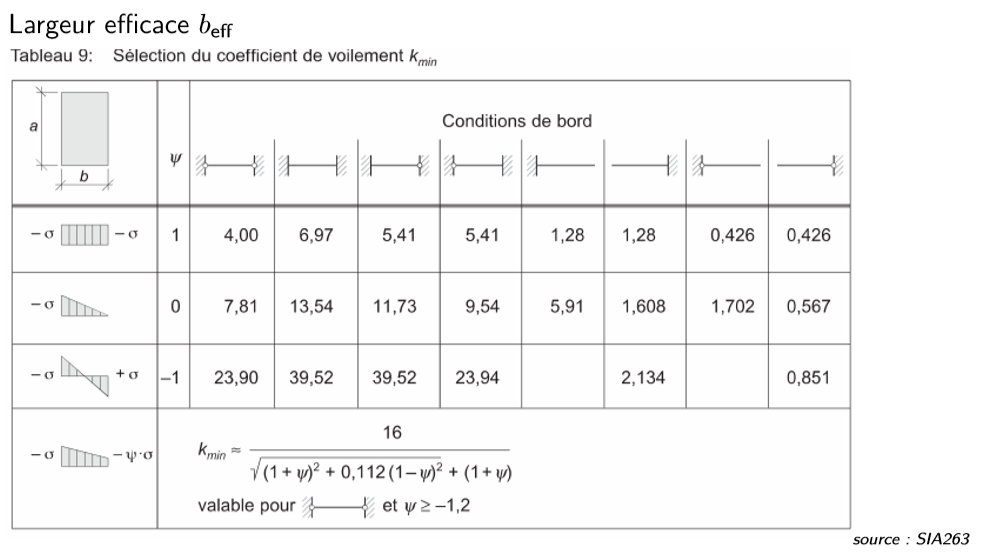

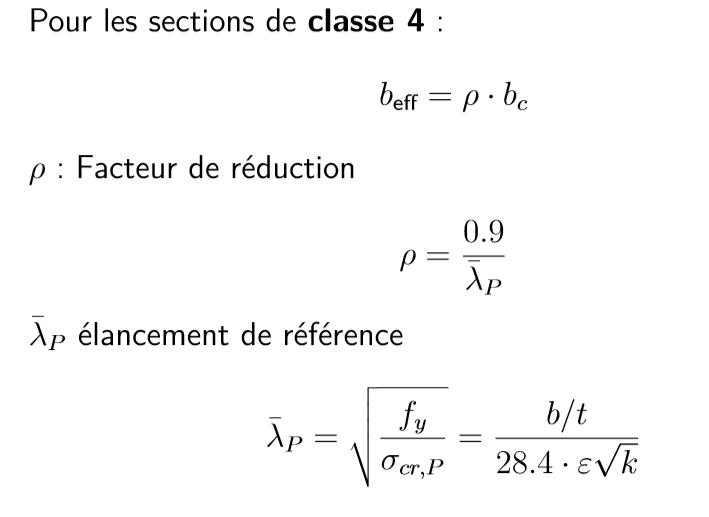

Pour le beff 
est seulement calculé en cas de classe 4 et uniquement pour des cas de compression pur et flexion pur 

kmin compression ame = 4

kmin compression semmelle = 0.426

kmin flexion ame = 23.9

In [8]:
def calculate_beff(b, t, fy, kmin, bc):
    """
    Calcule la largeur efficace (b_eff) pour une section en classe 4.
    :param b: Largeur brute de la section (en mm)
    :param t: Épaisseur de la section (en mm)
    :param fy: Limite d'élasticité de l'acier (en MPa)
    :param kmin: Coefficient de voilement (k_min)
    :param bc: Largeur considérée pour le calcul (en mm)
    :return: Largeur efficace (b_eff) en mm
    """
    # Calcul de epsilon
    epsilon = calculate_epsilon(fy)

    # Calcul de l'élancement de référence (λ̄P)
    lambda_p = (bc / t) / (28.4 * epsilon * (kmin**0.5))

    # Calcul du facteur de réduction (ρ)
    if lambda_p > 0:
        rho = 0.9 / lambda_p
    else:
        raise ValueError("λ̄P doit être supérieur à 0 pour calculer ρ.")

    # Limiter ρ à une valeur maximale de 1
    rho = min(rho, 1)

    # Calcul de la largeur efficace
    beff = rho * bc

    return beff

# Ajout dans la boucle principale
for i, element in enumerate(ELEMENTS, start=1):
    element_type = element["type"]
    b = element["b"]
    t = element["t"]
    fy = element["fy"]
    sollicitation = element["sollicitation"]

    if element_type == "âme":
        classe = classify_ame(b, t, fy, sollicitation)
    elif element_type == "semelle":
        bord = element["bord"]
        classe = classify_semelle(b, t, fy, sollicitation, bord)
    else:
        raise ValueError("Type d'élément invalide. Utilisez 'âme' ou 'semelle'.")

    print(f"Élément {i} ({element_type}):")
    print(f"  - Sollicitation : {sollicitation}")
    print(f"  - Largeur (b) : {b} mm")
    print(f"  - Épaisseur (t) : {t} mm")
    print(f"  - Limite d'élasticité (fy) : {fy} MPa")
    if element_type == "semelle":
        print(f"  - Bord : {bord}")
    print(f"  - Classe : {classe}")

    # Calculer b_eff uniquement si l'élément est en classe 4
    if classe == 4:
        if sollicitation == "compression":
            if element_type == "semelle":
                kmin = 0.426
                bc = b
            elif element_type == "âme":
                kmin = 4.0
                bc = b
        elif sollicitation == "flexion" and element_type == "âme":
            kmin = 23.9
            bc = b / 2  # Largeur effective pour une âme en flexion
        else:
            print(f"  - Pas de calcul de b_eff pour cette combinaison.")
            continue

        # Calculer b_eff
        beff = calculate_beff(b, t, fy, kmin, bc)
        print(f"  - Largeur efficace (b_eff) : {beff:.2f} mm")


Élément 1 (semelle):
  - Sollicitation : compression
  - Largeur (b) : 200 mm
  - Épaisseur (t) : 10 mm
  - Limite d'élasticité (fy) : 355 MPa
  - Bord : bord libre
  - Classe : 4
  - Largeur efficace (b_eff) : 135.73 mm
Élément 2 (âme):
  - Sollicitation : flexion simple
  - Largeur (b) : 200 mm
  - Épaisseur (t) : 8 mm
  - Limite d'élasticité (fy) : 235 MPa
  - Classe : 1
Élément 3 (semelle):
  - Sollicitation : compression
  - Largeur (b) : 150 mm
  - Épaisseur (t) : 6 mm
  - Limite d'élasticité (fy) : 275 MPa
  - Bord : bord libre
  - Classe : 4
  - Largeur efficace (b_eff) : 92.53 mm
